# CT scan segmetation using multiple slices per image - Lung dataset

As we are using 2D images to describe 3D CT scans, inevitably we are losing some information about original CT scan.
In this part we will try to give our model more information and still keep using 2D aproach. 
In previous aproach, we were slicing 3D scans and providing each of those slices to the model to learn from them but separately. So, our model doesn't know that slices are actually connected and represent a part of some bigger media.
Now, we will merge each slice with its previous and next slice of CT scan, in order to provide more information to out model during training.

In [1]:
%run ../Data-Preprocessing.ipynb
%run ../U-Net.ipynb
%run ../Train-Eval-Utils.ipynb

import torchvision.transforms as transforms

from torch.utils.data import DataLoader, ConcatDataset

Data will be preprocess on the same way as before. So, we still slicing the 3D CT scan into 2D images:

In [2]:
# run if this is the first run of lung segmentation:
# convert_ct_dataset_to_slices('Task06_Lung', 'Lung_Train', 'Lung_Val', 'Lung_Test', val_split=0.1, test_split=0.1, negative_downsampling_rate=5)

In the previous approach, the model received one slice (the one on which we want to do the segmentation), and now, in addition to the current slice, we pass the previous and the next slice of the CT scan to the model. 

As the slices are black and white, we can merge them into one 3-channel image and pass it to the model.

 <img src="../metadata/multipleSlicesForTrainingLungs.png" alt="multiple slices image" width="500" height="600"> 

According to that, we created CTDatasetMultiSlices class which will prepare our data on the we way descrribed above.

In [3]:
transform = transforms.Compose([
    transforms.Resize((128, 128), antialias=False),
    transforms.ConvertImageDtype(torch.float)
])

TRAIN_DIR = 'Lung_Train'

train_dataset = CTDatasetMultiSlices(root_dir=TRAIN_DIR, image_transform=transform, label_transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

VAL_DIR = 'Lung_Val'

val_dataset = CTDatasetMultiSlices(root_dir=VAL_DIR, image_transform=transform, label_transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

TEST_DIR = 'Lung_Test'

test_dataset = CTDatasetMultiSlices(root_dir=TEST_DIR, image_transform=transform, label_transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

If we look more closely at any of the training instances, we notice that they are blurry. This is due to the fact that there are actually three images in one instance.

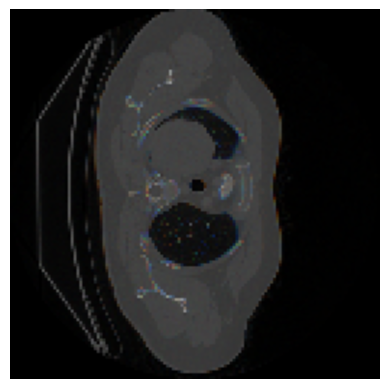

In [4]:
# class demo
image, label = train_dataset.__getitem__(75)

plt.imshow(image.permute(1, 2, 0).numpy())  # No cmap for 3-channel images
plt.axis('off')  # Turn off axis labels
plt.show()

In [5]:
image.shape

torch.Size([3, 128, 128])

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = DiceLoss()

Further, we will train the model with different parameters of u-net network that we created and, based on the validation set, conclude which model we are going to use.

Epoch 1/30 started...
Training loss: 0.9911077390841352
Validation loss: 0.9948915982687915
...........................................
Epoch 2/30 started...
Training loss: 0.967411877663155
Validation loss: 0.957739942603641
...........................................
Epoch 3/30 started...
Training loss: 0.8387816931174054
Validation loss: 0.8599171859246714
...........................................
Epoch 4/30 started...
Training loss: 0.5909886088797717
Validation loss: 0.7314888845991205
...........................................
Epoch 5/30 started...
Training loss: 0.46360470075917437
Validation loss: 0.755308676649023
...........................................
Epoch 6/30 started...
Training loss: 0.362773770239295
Validation loss: 0.811628994014528
...........................................
Epoch 7/30 started...
Training loss: 0.3985005588066287
Validation loss: 0.8070276114675734
...........................................
Epoch 8/30 started...
Training loss: 0.3329600570647

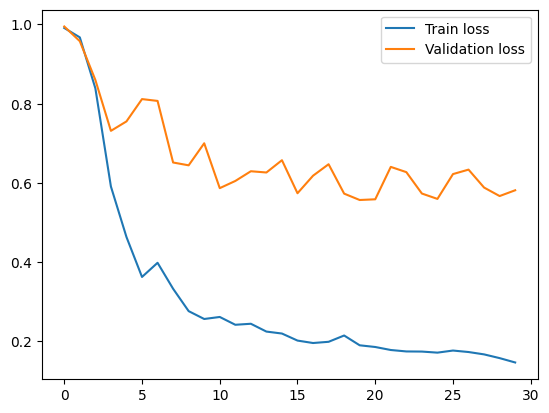

Best loss achieved on the validation set: 0.5569580727153354


In [7]:
model_3 = UNet(depth=3, in_channel=3)
model_3.to(device)
optimizer = torch.optim.Adam(model_3.parameters(), lr=0.001)
_, best_loss = train_loop_with_validation(model_3, 30, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

Epoch 1/30 started...
Training loss: 0.9913603886356198
Validation loss: 0.994978686173757
...........................................
Epoch 2/30 started...
Training loss: 0.9712300828801907
Validation loss: 0.9853962615684226
...........................................
Epoch 3/30 started...
Training loss: 0.8140485310942177
Validation loss: 0.851214951939053
...........................................
Epoch 4/30 started...
Training loss: 0.42503911402167344
Validation loss: 0.6818068656656477
...........................................
Epoch 5/30 started...
Training loss: 0.31118581207787116
Validation loss: 0.6300730296859035
...........................................
Epoch 6/30 started...
Training loss: 0.2836855771095772
Validation loss: 0.885947362140373
...........................................
Epoch 7/30 started...
Training loss: 0.24805208919494132
Validation loss: 0.5775382430465134
...........................................
Epoch 8/30 started...
Training loss: 0.228053230

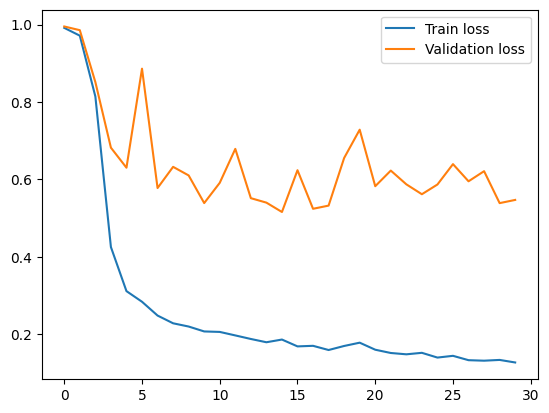

Best loss achieved on the validation set: 0.5156493650542365


In [8]:
model_4 = UNet(depth=5, in_channel=3)
model_4.to(device)
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)
_, best_loss = train_loop_with_validation(model_4, 30, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

Epoch 1/30 started...
Training loss: 0.99093586884863
Validation loss: 0.9948180582788255
...........................................
Epoch 2/30 started...
Training loss: 0.971586487157558
Validation loss: 0.9976077499213042
...........................................
Epoch 3/30 started...
Training loss: 0.7844908014545596
Validation loss: 0.9720155309747767
...........................................
Epoch 4/30 started...
Training loss: 0.4507734649549655
Validation loss: 0.6403302660694828
...........................................
Epoch 5/30 started...
Training loss: 0.3526089453115696
Validation loss: 0.8563886108221831
...........................................
Epoch 6/30 started...
Training loss: 0.29010019699732464
Validation loss: 0.6066532874548877
...........................................
Epoch 7/30 started...
Training loss: 0.23176490921315138
Validation loss: 0.685028099351459
...........................................
Epoch 8/30 started...
Training loss: 0.22271602909

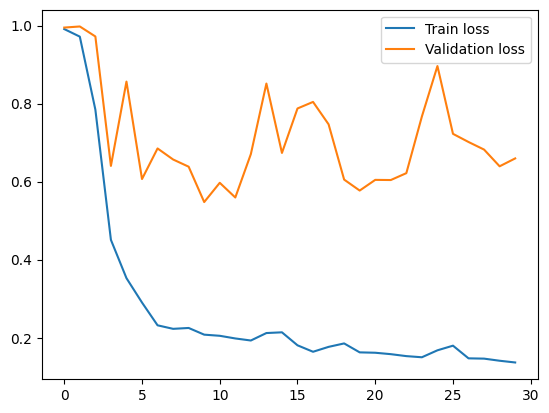

Best loss achieved on the validation set: 0.5476236508952247


In [9]:
model_5 = UNet(depth=7, in_channel=3)
model_5.to(device)
optimizer = torch.optim.Adam(model_5.parameters(), lr=0.001)
_, best_loss = train_loop_with_validation(model_5, 30, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

Epoch 1/60 started...
Training loss: 0.9932523810766577
Validation loss: 0.9968671931160821
...........................................
Epoch 2/60 started...
Training loss: 0.9888677398363749
Validation loss: 0.9949463771449195
...........................................
Epoch 3/60 started...
Training loss: 0.9776003481895943
Validation loss: 0.9891240409126988
...........................................
Epoch 4/60 started...
Training loss: 0.945694378236445
Validation loss: 0.9972597901467923
...........................................
Epoch 5/60 started...
Training loss: 0.7812802132552232
Validation loss: 0.8564752903249528
...........................................
Epoch 6/60 started...
Training loss: 0.5366418734798587
Validation loss: 0.715391641413724
...........................................
Epoch 7/60 started...
Training loss: 0.3471236175637904
Validation loss: 0.7775123693324901
...........................................
Epoch 8/60 started...
Training loss: 0.30436717300

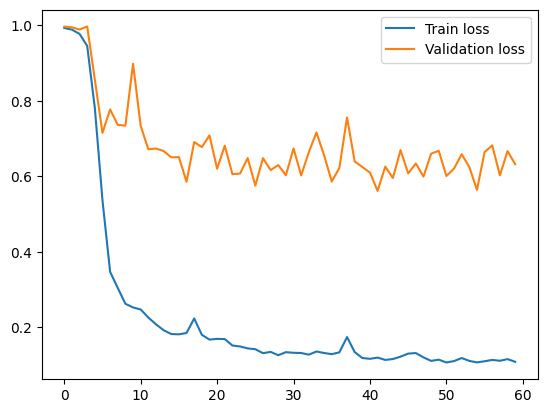

Best loss achieved on the validation set: 0.5614673616709532


In [11]:
model_lower_lr = UNet(depth=3, in_channel=3)
model_lower_lr.to(device)
optimizer = torch.optim.Adam(model_lower_lr.parameters(), lr=0.0005)
_, best_loss = train_loop_with_validation(model_lower_lr, 60, train_loader, val_loader, optimizer, criterion)
print(f'Best loss achieved on the validation set: {best_loss}')

In [12]:
train_val_concat_dataset = ConcatDataset([train_dataset, val_dataset])
train_val_concat_loader = DataLoader(train_val_concat_dataset, batch_size=32, shuffle=True, num_workers=os.cpu_count())

Epoch 1/50 started...
Training loss: 0.9905593467921745
...........................................
Epoch 2/50 started...
Training loss: 0.9695544499691909
...........................................
Epoch 3/50 started...
Training loss: 0.8397009314560309
...........................................
Epoch 4/50 started...
Training loss: 0.5608072208195198
...........................................
Epoch 5/50 started...
Training loss: 0.4486147712885849
...........................................
Epoch 6/50 started...
Training loss: 0.41187130677990796
...........................................
Epoch 7/50 started...
Training loss: 0.37705931624745936
...........................................
Epoch 8/50 started...
Training loss: 0.3252515686236746
...........................................
Epoch 9/50 started...
Training loss: 0.2943488751969686
...........................................
Epoch 10/50 started...
Training loss: 0.2778279432436315
.........................................

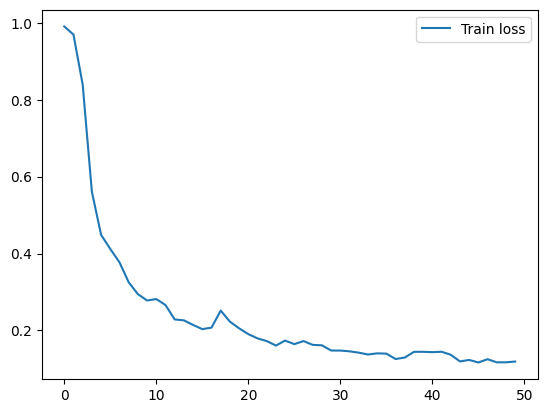

In [14]:
model_final = UNet(in_channel=3, depth=3)
model_final.to(device)
optimizer = torch.optim.Adam(model_final.parameters(), lr=0.001)
best_model, best_loss = train_loop(model_final, 50, train_val_concat_loader, optimizer, criterion)

In [18]:
torch.save(best_model.state_dict(), '../models/modelLungsMultiSlices.pth')

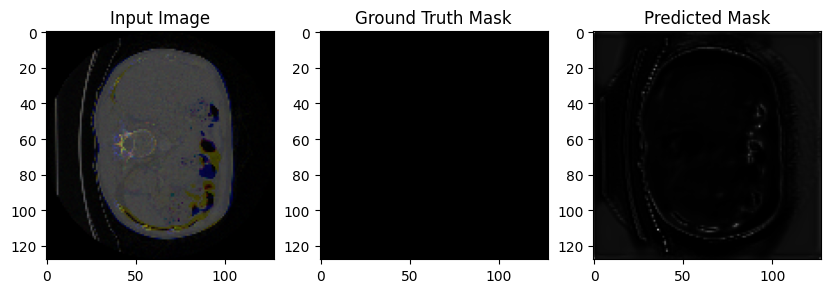

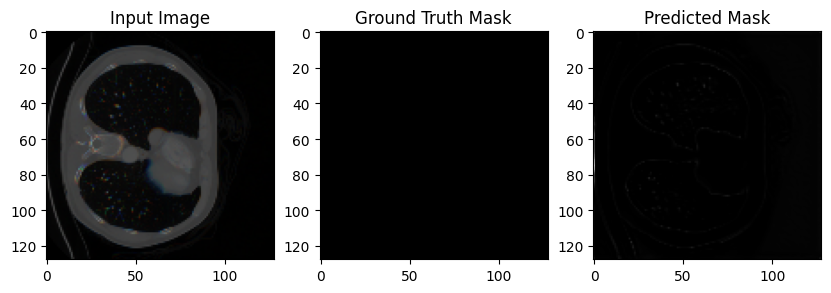

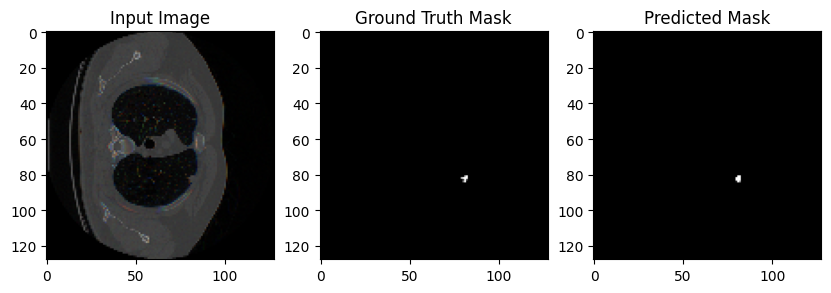

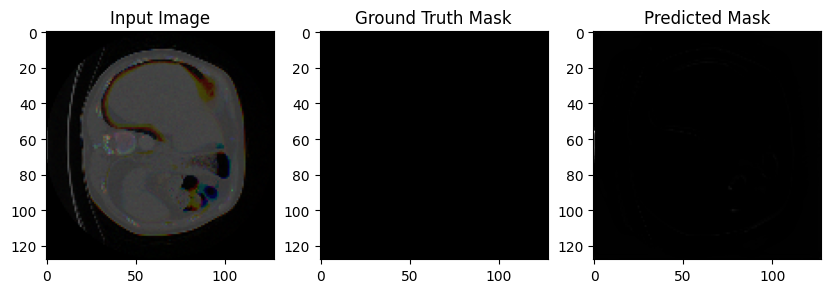

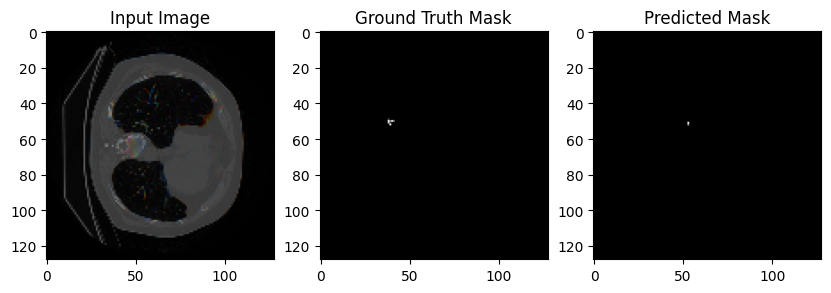

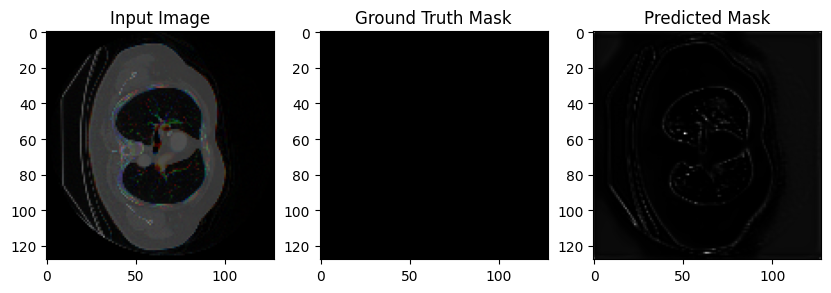

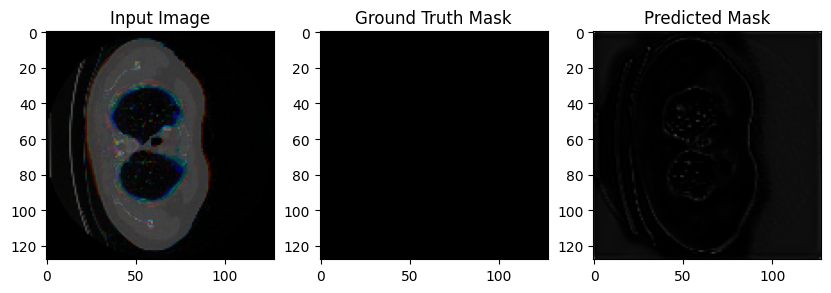

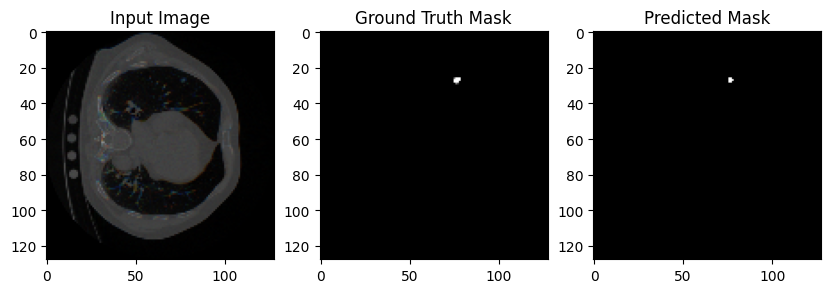

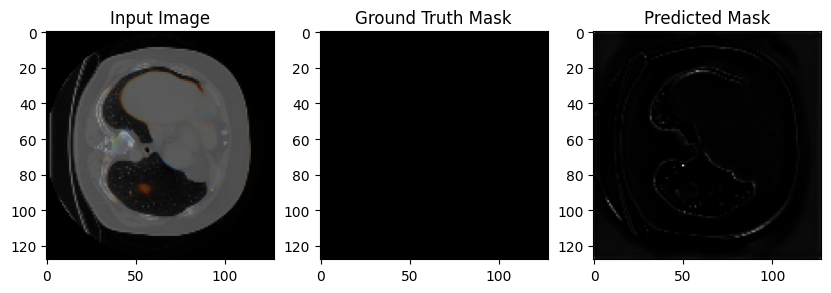

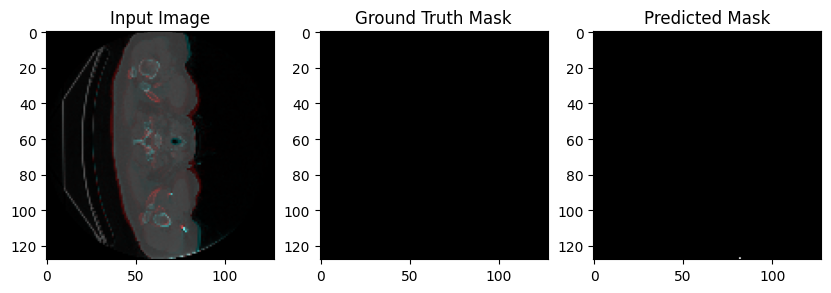

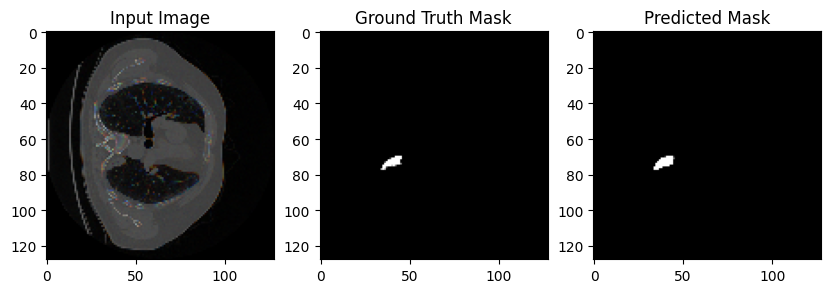

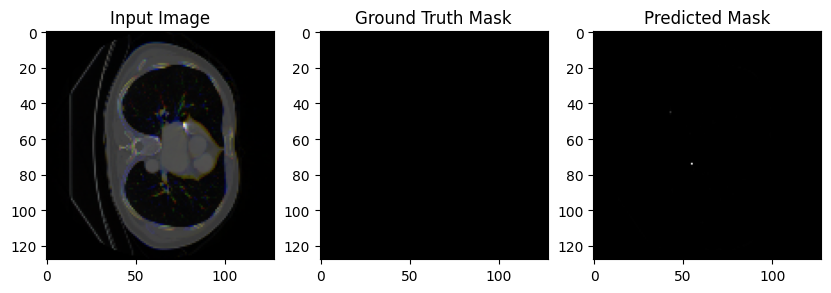

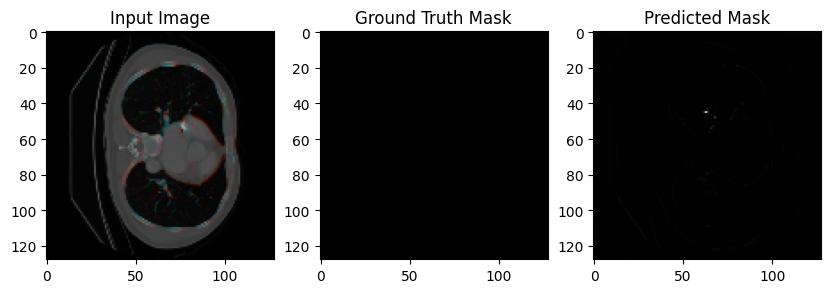

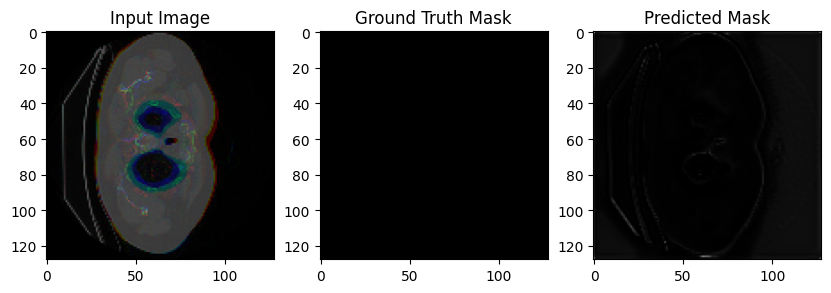

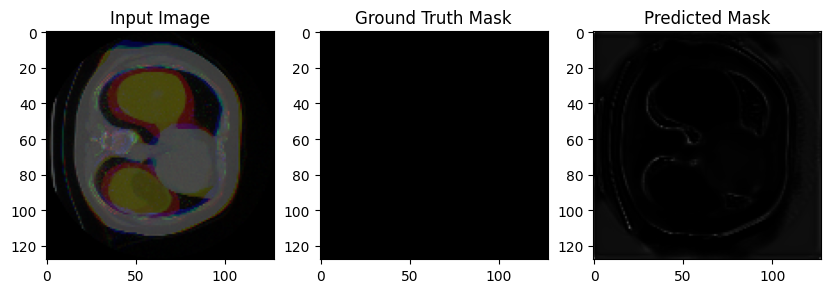

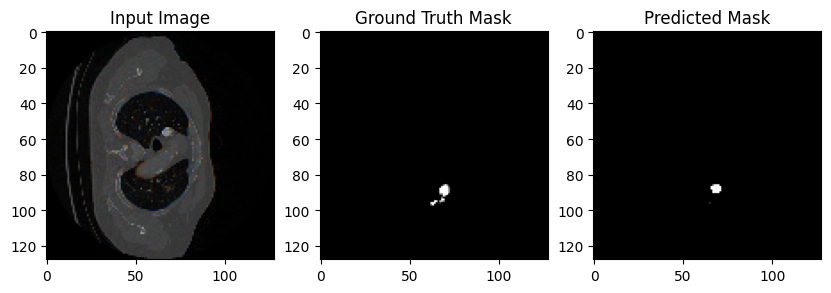

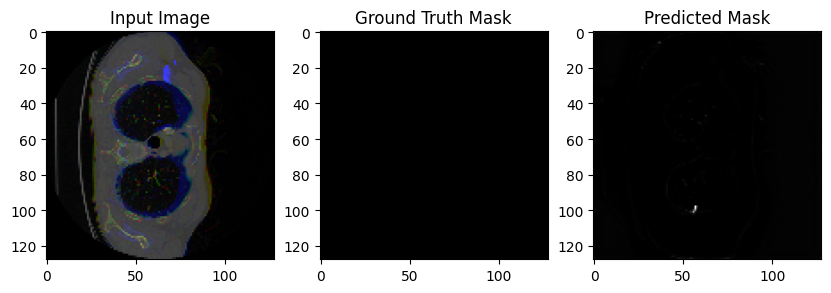

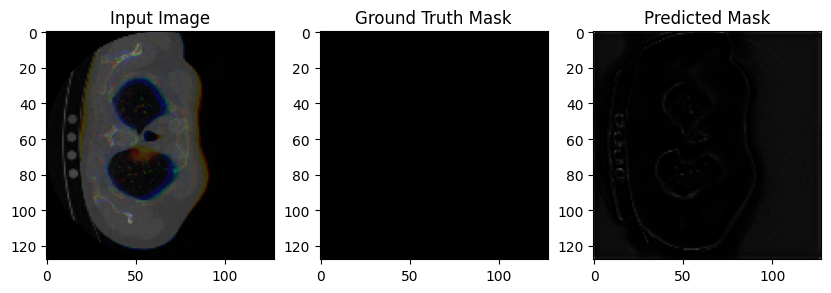

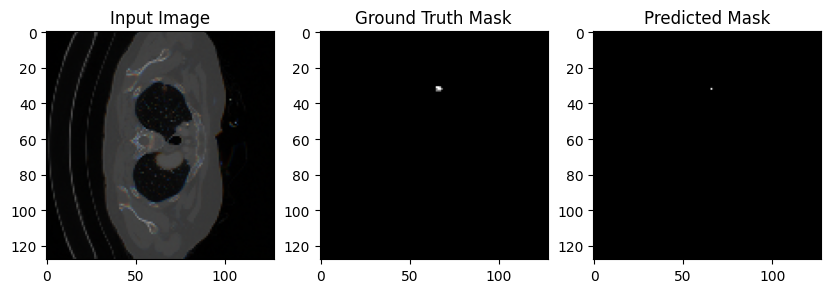

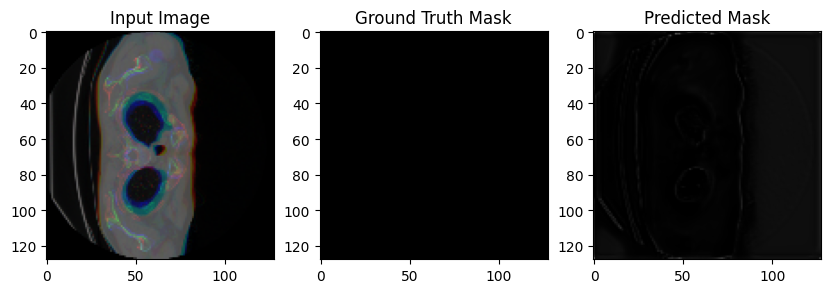

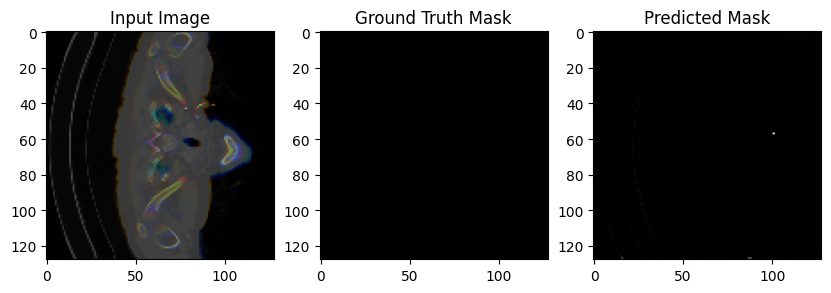

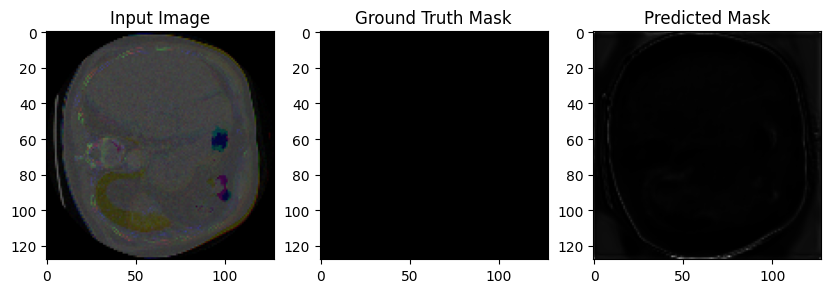

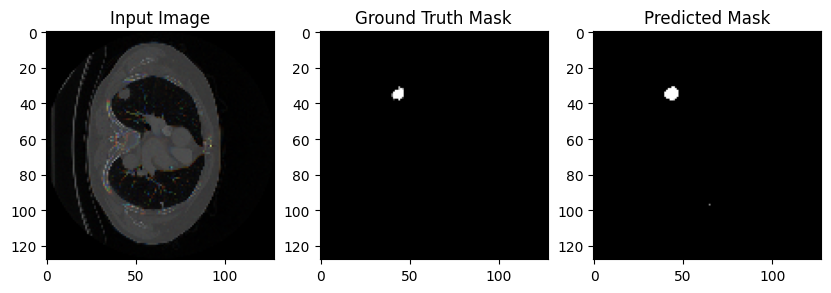

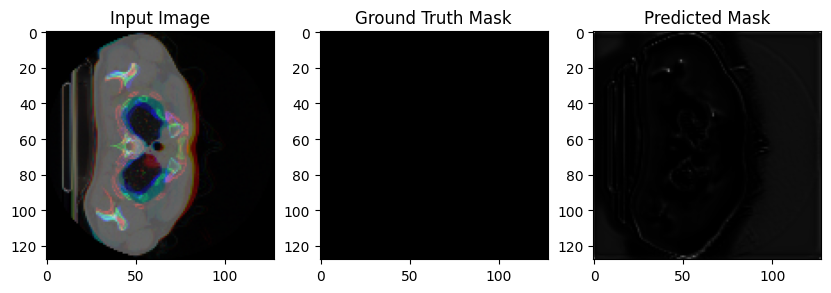

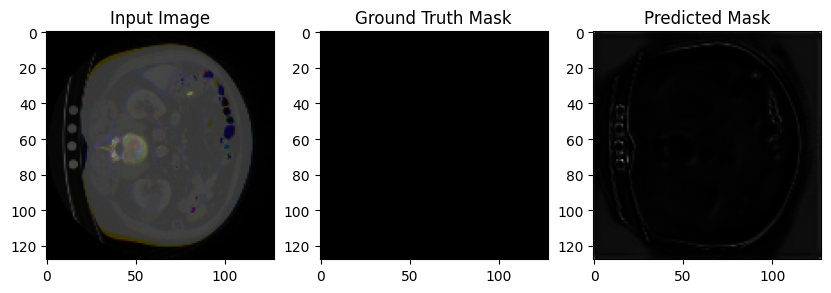

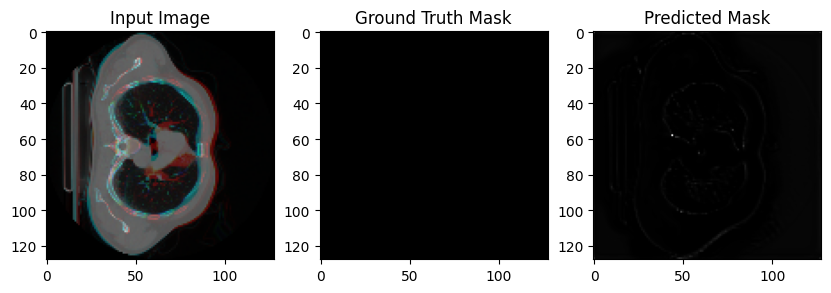

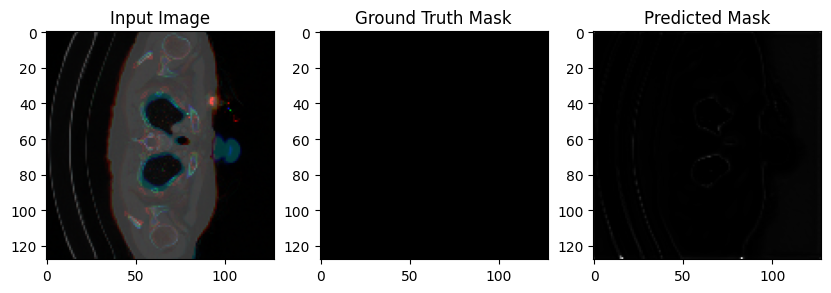

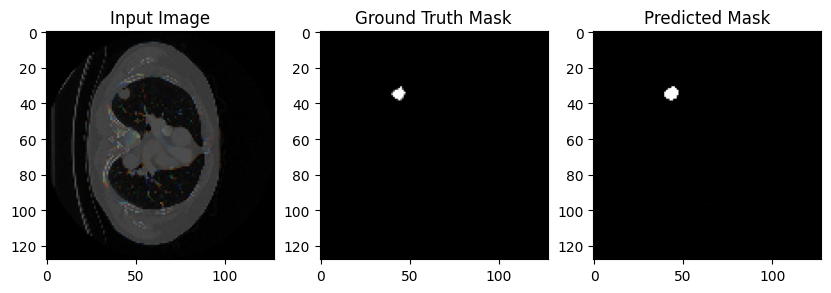

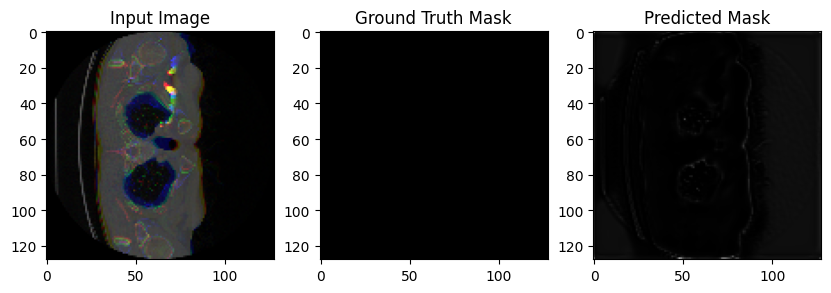

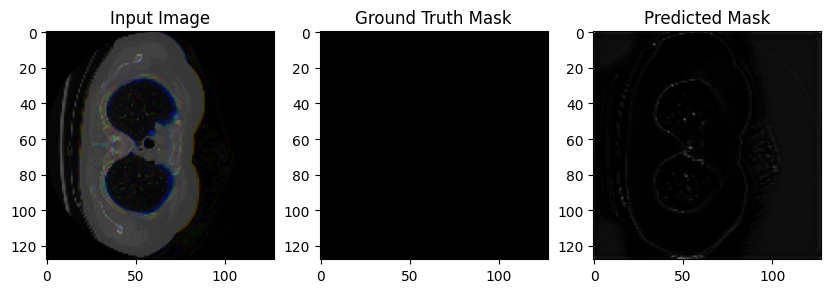

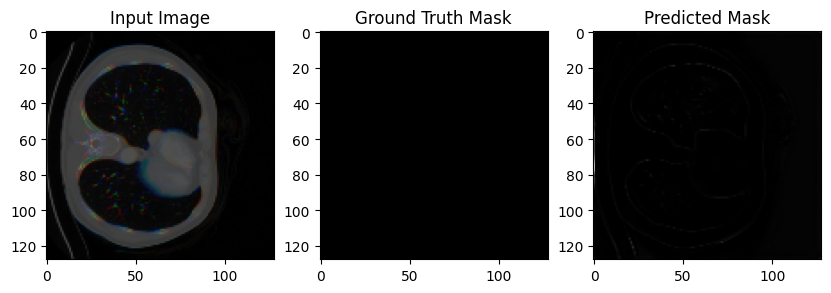

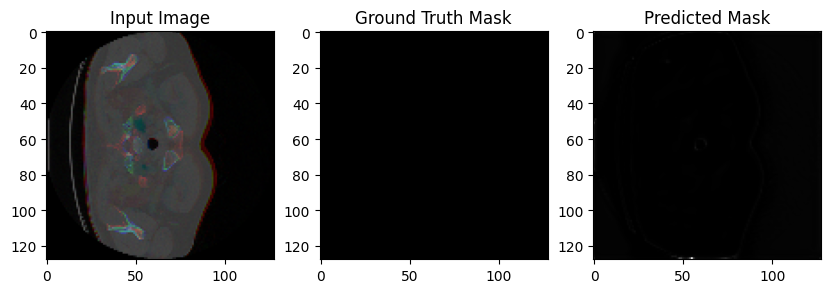

In [19]:
display_predictions(best_model, train_loader, device, 32)

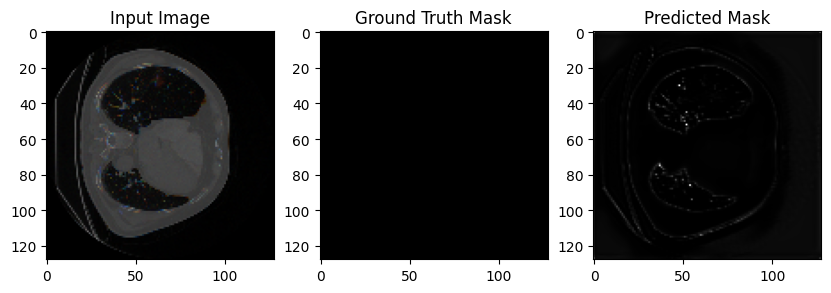

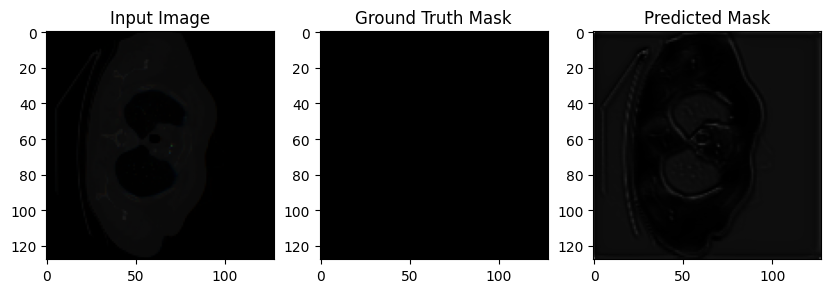

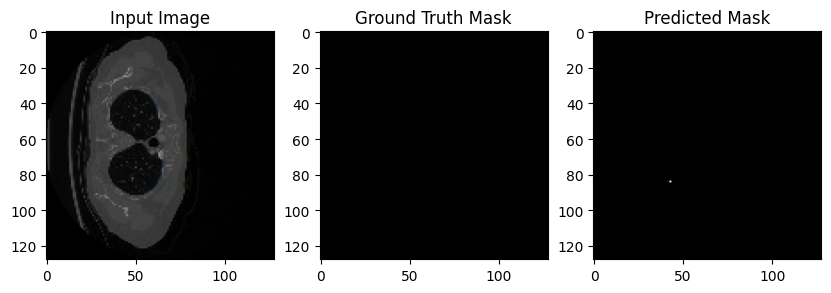

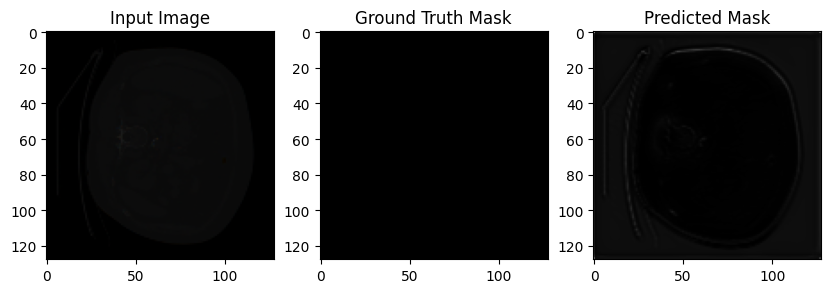

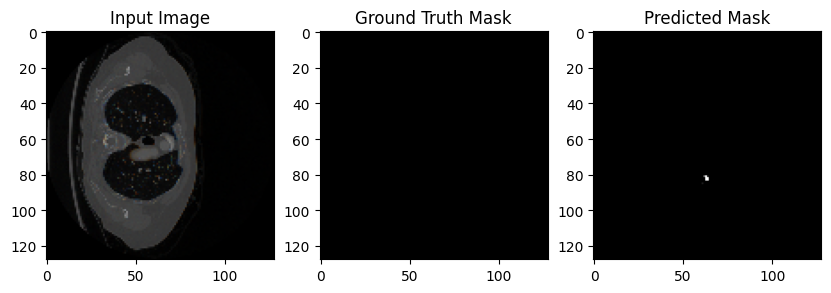

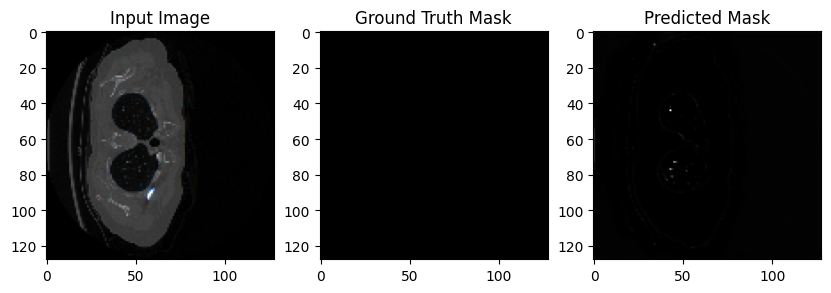

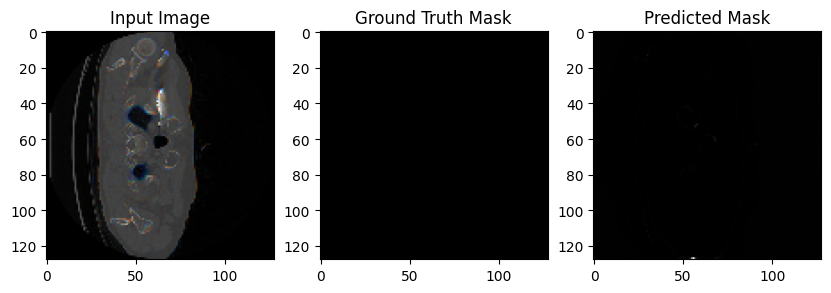

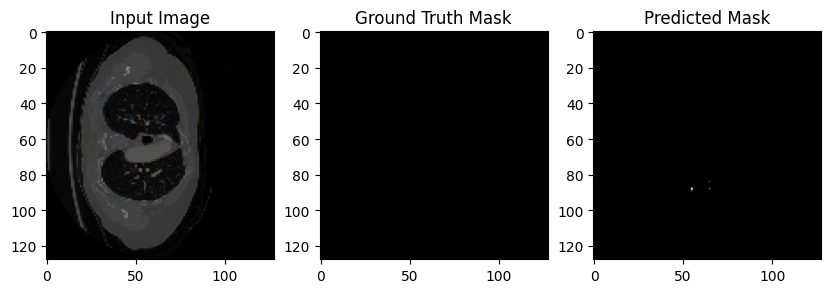

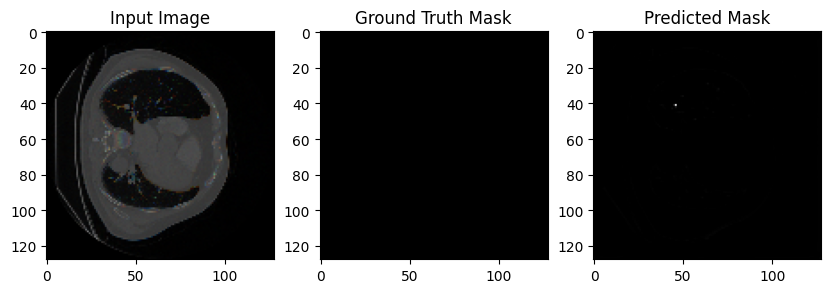

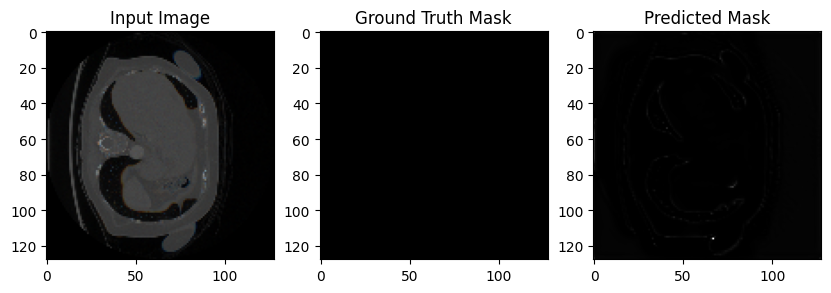

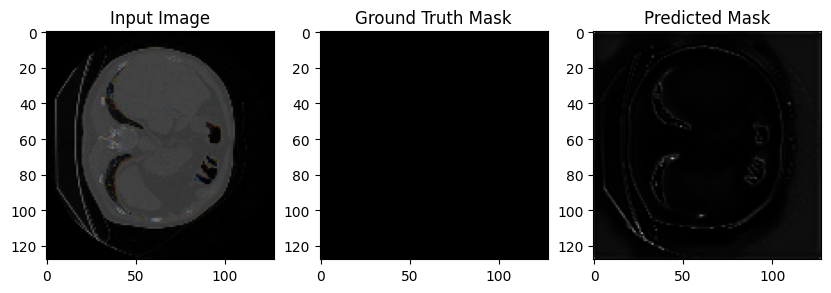

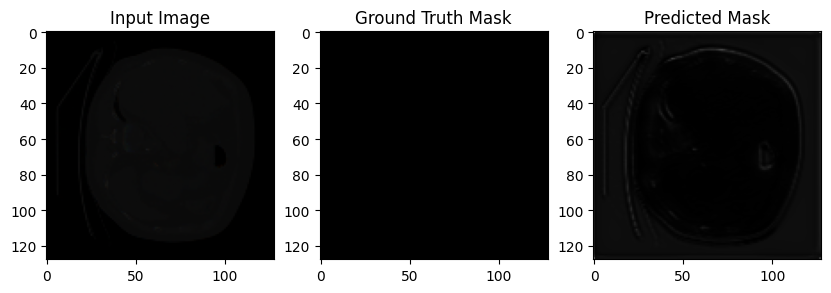

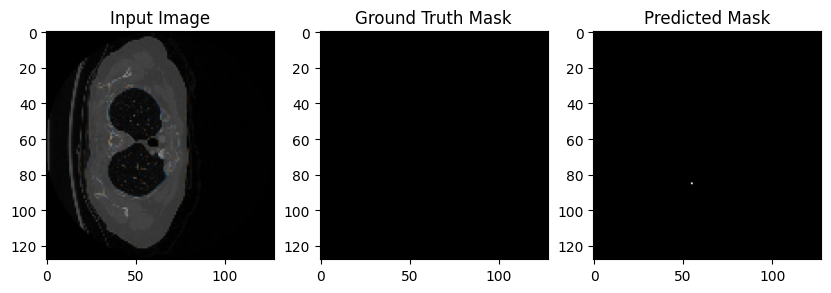

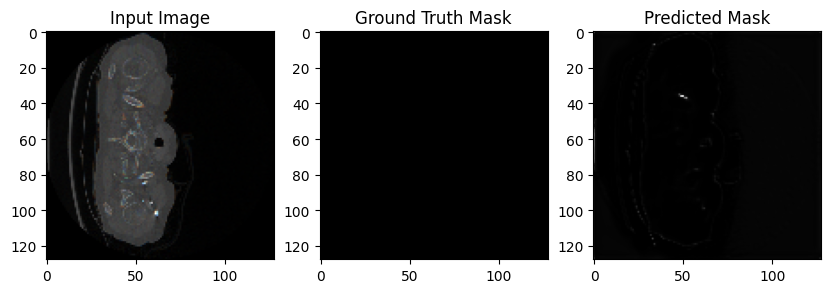

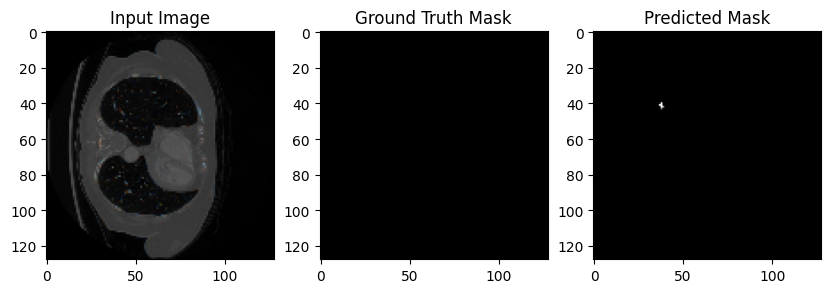

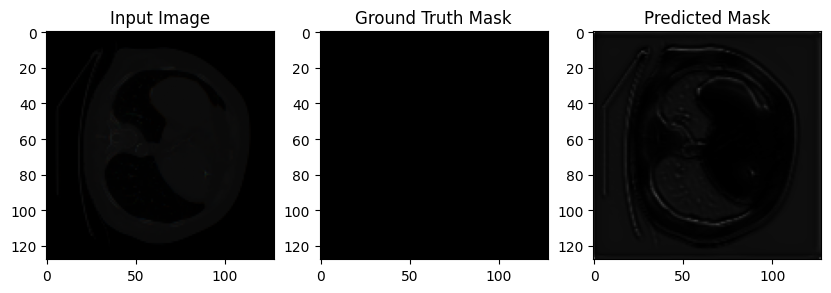

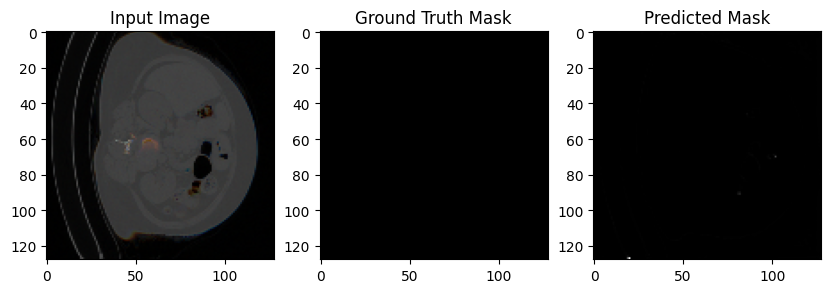

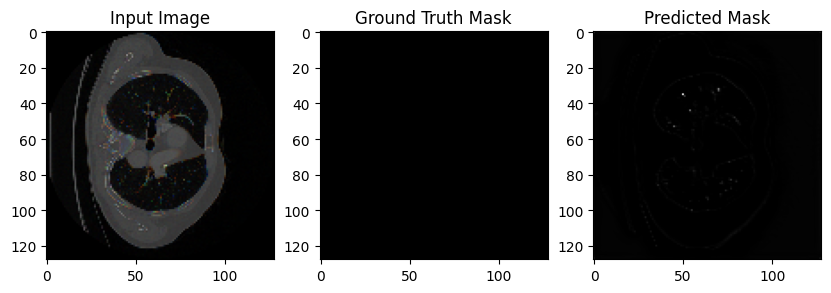

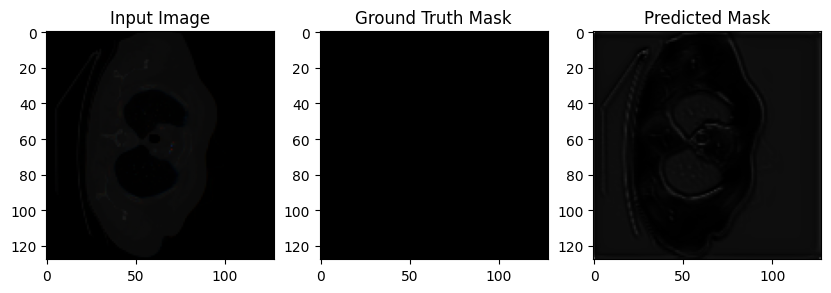

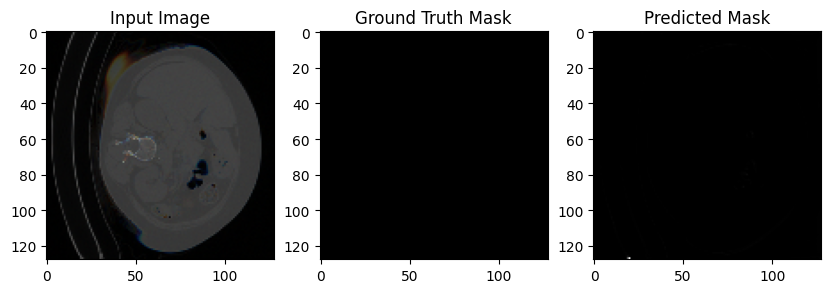

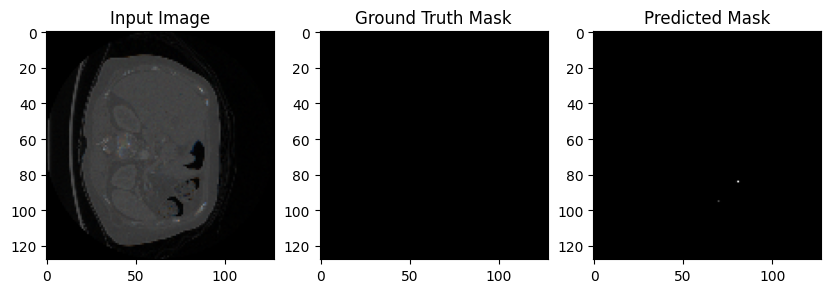

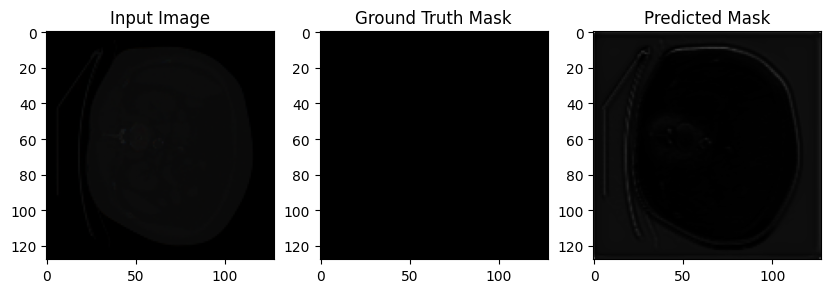

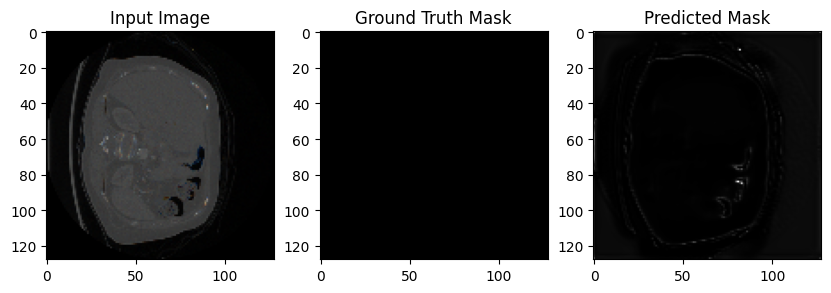

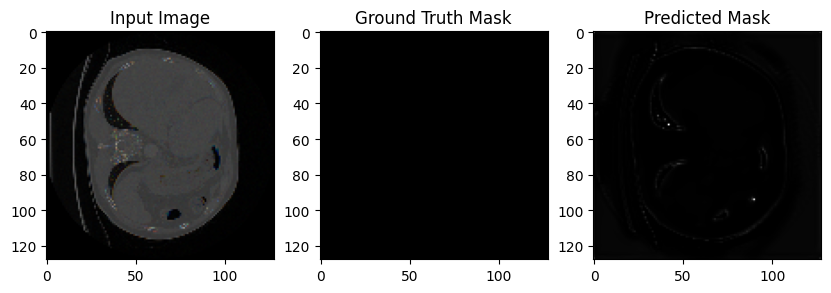

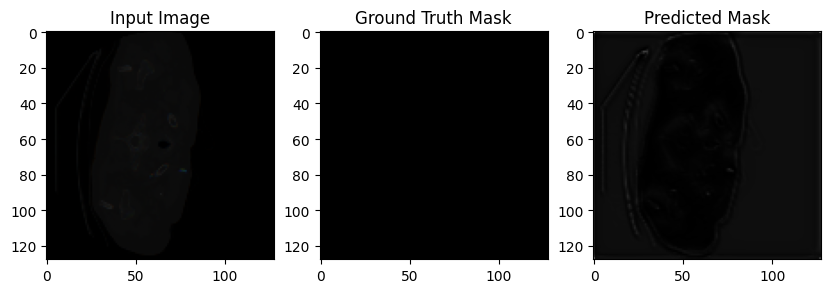

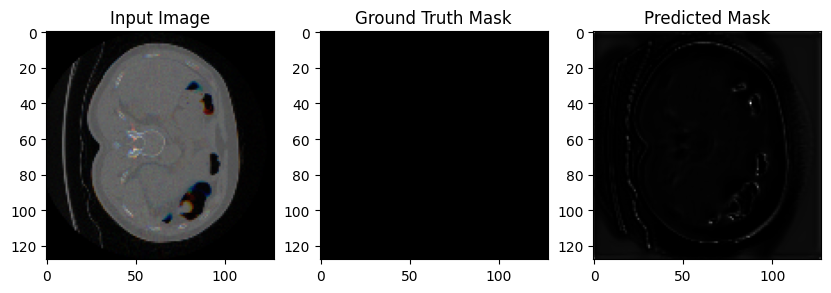

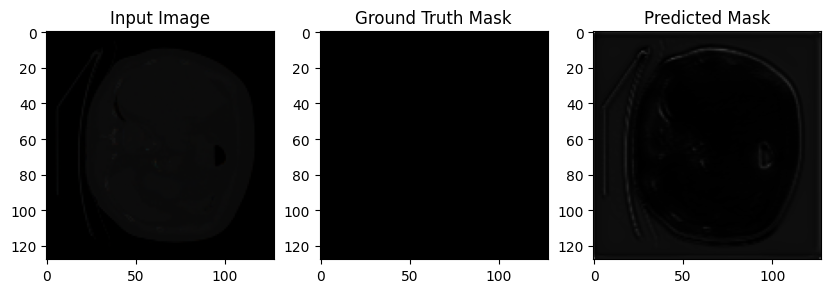

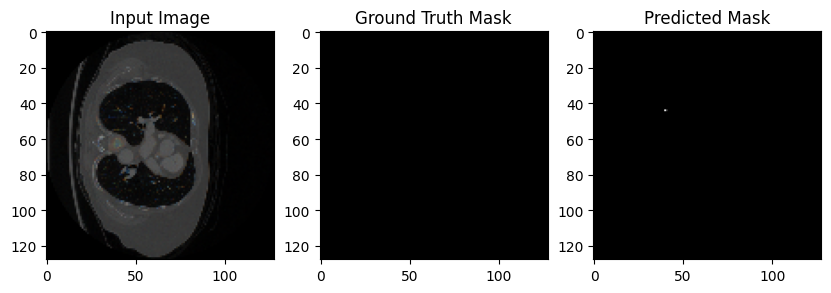

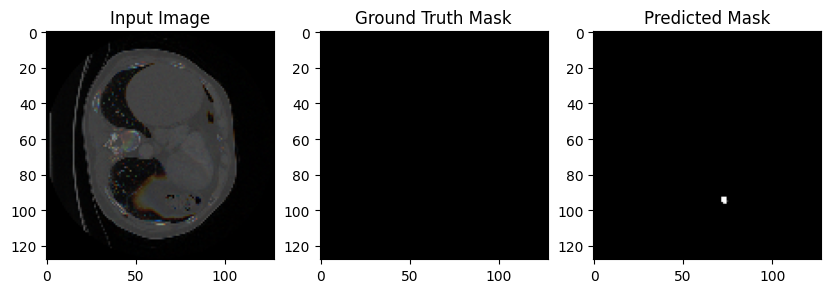

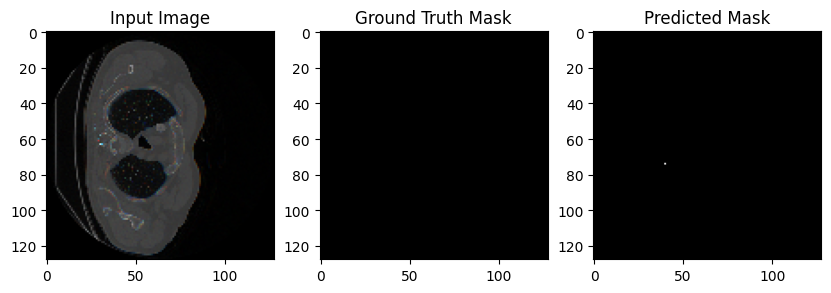

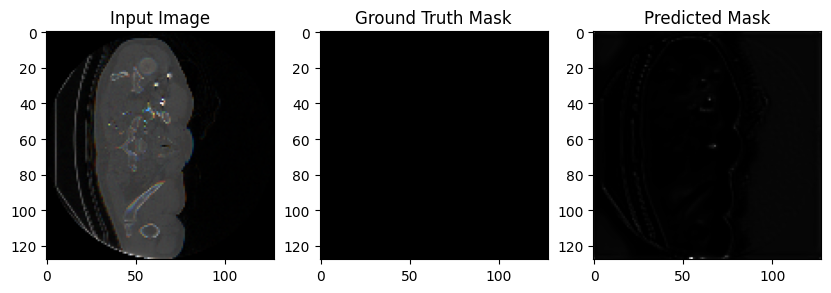

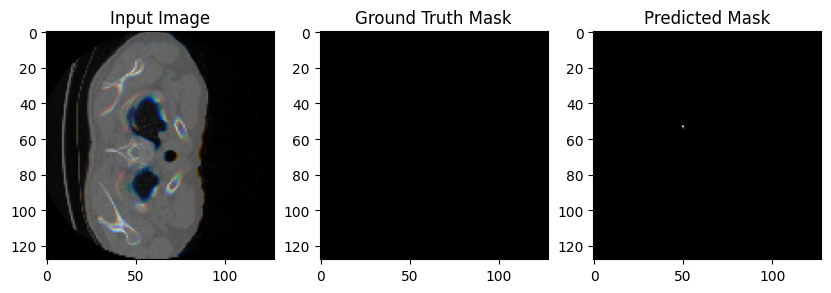

In [20]:
display_predictions(best_model, test_loader, device, 32)